In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.metrics import classification_report as cr
from sklearn.metrics import confusion_matrix as cm
from sklearn.preprocessing import LabelEncoder
import joblib

## Importing Data

In [11]:
file_path = r"Data/Prediction_Data.xlsx"

In [13]:
sheet_name = "vw_churndata"

In [47]:
data = pd.read_excel(file_path, sheet_name=sheet_name)

In [49]:
print(data.head())

  Customer_ID  Gender  Age Married           State  Number_of_Referrals  \
0   11098-MAD  Female   30     Yes  Madhya Pradesh                    0   
1   11114-PUN    Male   51      No          Punjab                    5   
2   11167-WES  Female   43     Yes     West Bengal                    3   
3   11179-MAH    Male   35      No     Maharashtra                   10   
4   11180-TAM    Male   75     Yes      Tamil Nadu                   12   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                31     Deal 1           Yes             No  ...   
1                 9     Deal 5           Yes             No  ...   
2                28     Deal 1           Yes            Yes  ...   
3                12        NaN           Yes             No  ...   
4                27     Deal 2           Yes             No  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0  Bank Withdrawal          95.10       6683.40          0.00   
1  Bank Wi

## Data Preprocessing

In [51]:
data = data.drop(['Customer_ID', 'Churn_Category','Churn_Reason'],axis=1)

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       1000 non-null   object 
 1   Age                          1000 non-null   int64  
 2   Married                      1000 non-null   object 
 3   State                        1000 non-null   object 
 4   Number_of_Referrals          1000 non-null   int64  
 5   Tenure_in_Months             1000 non-null   int64  
 6   Value_Deal                   432 non-null    object 
 7   Phone_Service                1000 non-null   object 
 8   Multiple_Lines               996 non-null    object 
 9   Internet_Service             1000 non-null   object 
 10  Internet_Type                784 non-null    object 
 11  Online_Security              987 non-null    object 
 12  Online_Backup                987 non-null    object 
 13  Device_Protection_P

In [73]:
categorical = data.select_dtypes(include="object")
col = list(categorical.columns)
col.remove("Customer_Status")

In [76]:
label_encoders = {}
for cols in col:
    label_encoders[cols] = LabelEncoder()
    data[cols] = label_encoders[cols].fit_transform(data[cols])

In [80]:
data.head()

,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,Internet_Service,...,Contract,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status
0,0,30,1,11,0,31,0,1,0,1,...,2,0,0,95.10,6683.40,0.00,0,631.72,7315.12,Stayed
1,1,51,0,15,5,9,4,1,0,1,...,0,1,0,49.15,169.05,0.00,10,122.37,301.42,Churned
2,0,43,1,21,3,28,0,1,1,1,...,2,1,0,116.05,8297.50,42.57,110,1872.98,10237.91,Stayed
3,1,35,0,12,10,12,5,1,0,1,...,2,1,1,84.40,5969.30,0.00,0,219.39,6188.69,Stayed
4,1,75,1,17,12,27,1,1,0,1,...,2,1,1,72.60,4084.35,0.00,140,332.08,4556.43,Stayed


In [82]:
data["Customer_Status"] = data["Customer_Status"].map({'Stayed':0, "Churned":1})

In [84]:
X = data.drop('Customer_Status', axis=1)
y= data["Customer_Status"]

In [86]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

## Training

In [93]:
model = rfc(n_estimators = 100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

## Evaluation

In [ ]:
y_pred = model.predict(X_test)

### Confusion Matrix

In [112]:

conf_m = (cm(y_test, y_pred))
df_conf_m = pd.DataFrame(conf_m, 
                         index=["Actual Stayed", "Actual Churned"], 
                         columns=["Predicted Stayed", "Predicted Churned"])

print("Confusion Matrix...")
(df_conf_m)

Confusion Matrix:


,Predicted Stayed,Predicted Churned
Actual Stayed,236,11
Actual Churned,37,46


## Classification Report

In [121]:
print("Classification Report...")
print(cr(y_test,y_pred))

Classification Report...
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       247
           1       0.81      0.55      0.66        83

    accuracy                           0.85       330
   macro avg       0.84      0.75      0.78       330
weighted avg       0.85      0.85      0.84       330



## Features Importance

In [126]:
imp = model.feature_importances_
indices = np.argsort(imp)[::-1]

In [148]:
colors = sns.color_palette("husl", len(indices))

C:\Users\JIYA SINHA\AppData\Local\Temp\ipykernel_4708\3692049233.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=imp[indices], y=X.columns[indices], palette=colors)


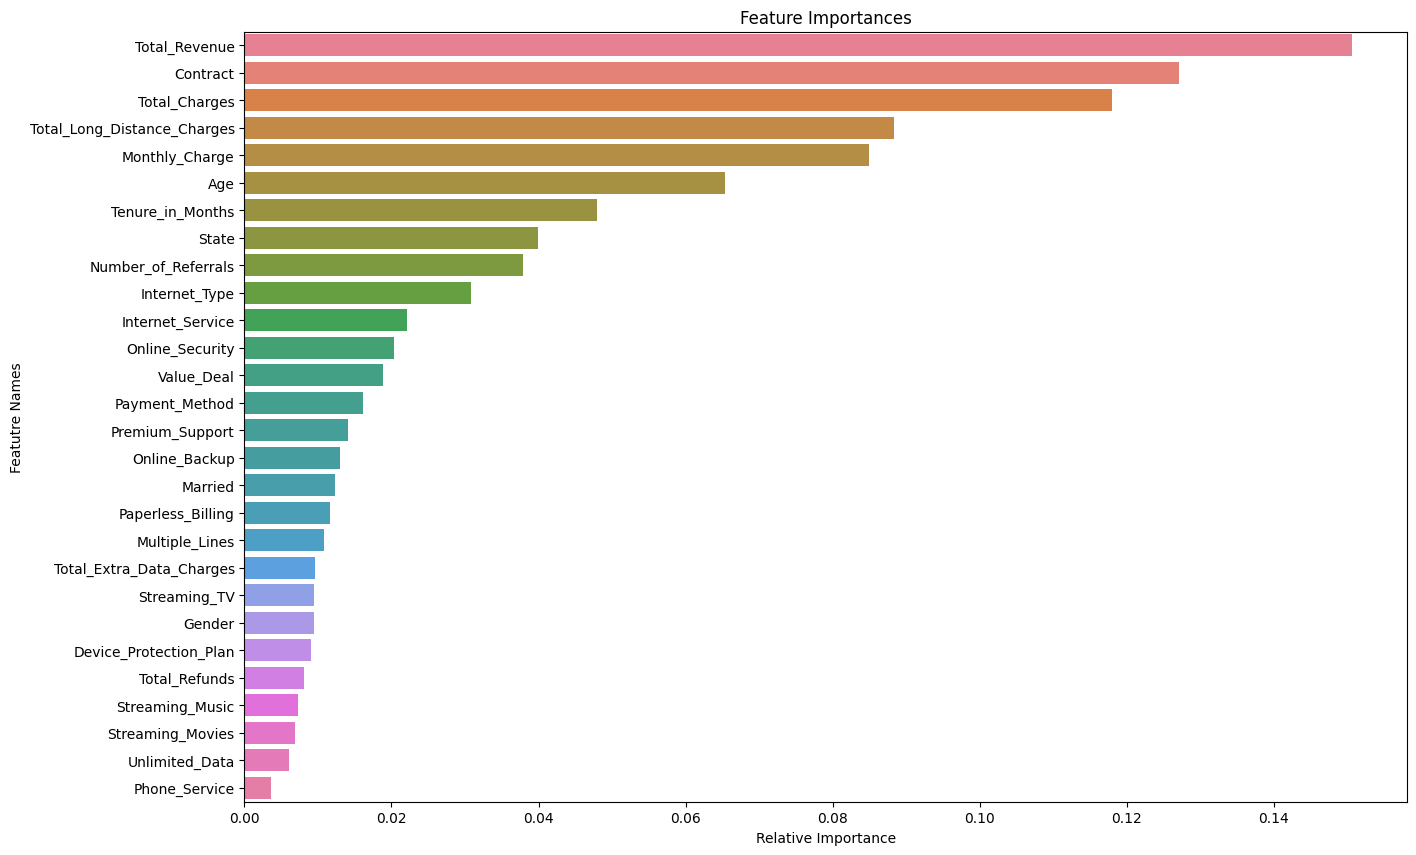

In [150]:
plt.figure(figsize=(15,10))
sns.barplot(x=imp[indices], y=X.columns[indices], palette=colors)
plt.title("Feature Importances")
plt.xlabel("Relative Importance")
plt.ylabel("Featutre Names")
plt.show()

## Prediction

In [154]:
file_path_2 = r"Data/Prediction_Data.xlsx"
sheet_name = "vw_joindata"
new_data = pd.read_excel(file_path_2, sheet_name=sheet_name)
print(new_data.head())

  Customer_ID  Gender  Age Married        State  Number_of_Referrals  \
0   11751-TAM  Female   18      No   Tamil Nadu                    5   
1   12056-WES    Male   27      No  West Bengal                    2   
2   12136-RAJ  Female   25     Yes    Rajasthan                    2   
3   12257-ASS  Female   39      No        Assam                    9   
4   12340-DEL  Female   51     Yes        Delhi                    0   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                 7     Deal 5            No             No  ...   
1                20        NaN           Yes             No  ...   
2                35        NaN           Yes             No  ...   
3                 1        NaN           Yes             No  ...   
4                10        NaN           Yes             No  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0     Mailed Check          24.30         38.45           0.0   
1  Bank Withdrawal          

In [156]:
original_data = new_data.copy()

In [158]:
id_cus = new_data['Customer_ID']
new_data = new_data.drop(['Customer_ID','Customer_Status', 'Churn_Category', 'Churn_Reason'],axis=1)

In [160]:
cat = new_data.select_dtypes(include="object")
col = list(cat.columns)

In [162]:
for cols in col:
    new_data[cols] = label_encoders[cols].transform(new_data[cols])

In [166]:
pred = model.predict(new_data)

In [168]:
original_data['Customer_Status_pred'] = pred
original_data = original_data[original_data['Customer_Status_pred'] == 1]

In [170]:
original_data.to_csv(r"Data/prediction.csv")